# Dependencies

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
data_dir='C:\\Users\\sabar\\Desktop\\Intern\\train'

# Removing incompatiable images

In [ ]:
import os
import cv2
import imghdr
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32)

Found 31663 files belonging to 2 classes.


In [7]:
len(data)

990

In [8]:
data_iterator= data.as_numpy_iterator()

In [9]:
data_iterator

In [10]:
batch= data_iterator.next()

In [11]:
len(batch)

2

In [12]:
batch[0]

array([[[[1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         [1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         [1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         ...,
         [1.56000000e+02, 1.86000000e+02, 2.10000000e+02],
         [1.51791016e+02, 1.81791016e+02, 2.05791016e+02],
         [1.51791016e+02, 1.81791016e+02, 2.05791016e+02]],

        [[1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         [1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         [1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         ...,
         [1.56000000e+02, 1.86000000e+02, 2.10000000e+02],
         [1.53373047e+02, 1.83373047e+02, 2.07373047e+02],
         [1.53373047e+02, 1.83373047e+02, 2.07373047e+02]],

        [[1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         [1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         [1.30000000e+02, 1.66000000e+02, 1.92000000e+02],
         ...,
         [1.56000000e+02, 1.86000000e+02, 2.10000000e+02],
         [

In [13]:
batch[0].shape

(32, 256, 256, 3)

In [14]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

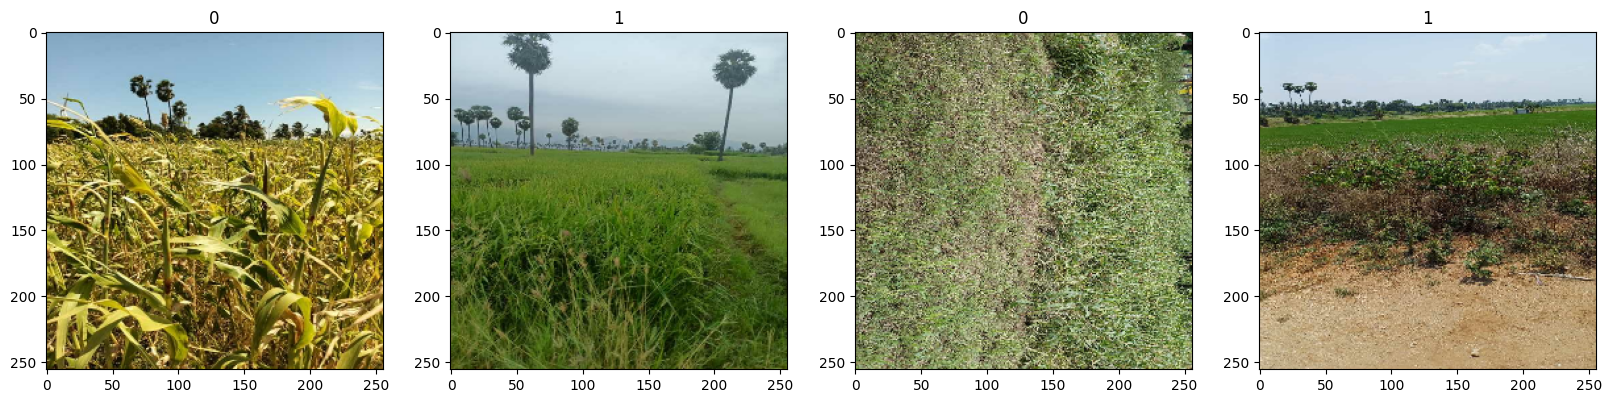

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# class 1 paddy
# class 0 other crops

# Scaling the images

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
scaled_iterator= data.as_numpy_iterator()

In [18]:
batch=scaled_iterator.next()

In [19]:
batch[0].max()

1.0

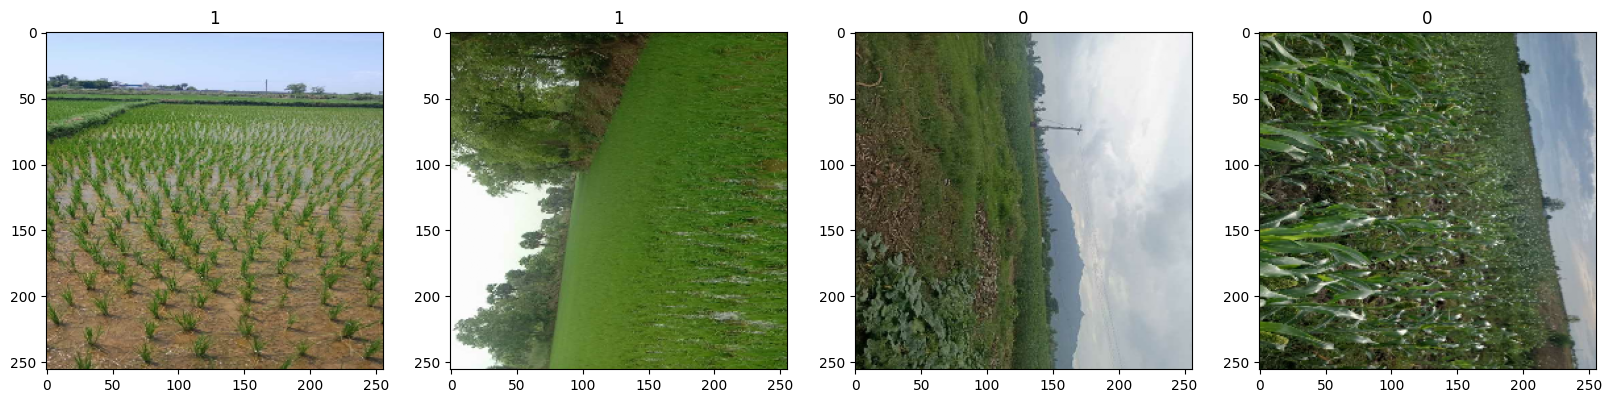

In [20]:
# Not in integers
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Splitting the data

In [21]:
len(data)

990

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size+val_size+test_size

990

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Training the model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model= Sequential()

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss for early stopping
    patience=5,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True   # Restore weights from the epoch with the best monitored metric value
)


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)       

In [31]:
logdir='C:\\Users\\sabar\\Desktop\\Intern\\logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback,early_stopping])

# Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    pred = model.predict(X)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

In [ ]:
print(pre.result(), re.result(), acc.result())

In [38]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.9810026288032532,Recall:0.9962486624717712,Accuracy:0.9863535165786743


In [52]:
test_metrics = model.evaluate(test)

99/99 [==============================] - 60s 223ms/step - loss: 0.0372 - accuracy: 0.9879


In [53]:
print(f'Accuracy:{test_metrics[1]}')
print(f'Training loss:{test_metrics[0]}')     

Accuracy:0.9879403114318848
Training loss:0.03715256229043007


# Test

In [60]:
import cv2

In [ ]:
img = cv2.imread("Path_to_image")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
pred = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
pred

In [ ]:
if pred > 0.5: 
    print(f'Predicted class is Paddy')
else:
    print(f'Predicted class is another crop')

# Save the Model

In [28]:
from tensorflow.keraOs.models import load_model

In [ ]:
data_dir="C:\\Users\\sabar\\Desktop\\Intern"

In [ ]:
model_path=os.path.join(data_dir,'models','126learlystoppinge-16.keras')

In [ ]:
model.save(model_path)

In [29]:
new_model = load_model('C:\\Users\\sabar\\Desktop\\Intern\\models\\augmentede-15.keras')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))